In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
#график выводится как обычная картинка
%matplotlib inline 

## Распределение Лапласа

$$f(x)=\frac{\alpha}2e^{-\alpha|x-\beta|}$$

Математическое ожидание: $ \beta $

Дисперсия: $ \frac{2}{\alpha^2} $

In [89]:
# Задаем теор. случ. величину с параметрами альфа и бета
#myalpha = 1 # коэффициент масштаба с параметрами alpha и beta
alpha = 1 #коэффициент масштаба    
beta = 0 # коэффициент сдвига

Laplace_rv = sts.laplace(beta, alpha,)
# Генерация выборки V = 1000
V_Laplace_rv = Laplace_rv.rvs(1000)


Text(0.5, 0, '$x$')

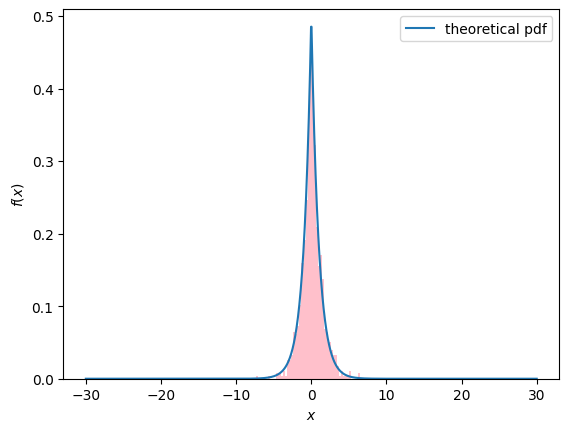

In [90]:
# Построим теоретическую плотность распределения
x = np.linspace(-30,30,1000) #выборка
pdf = Laplace_rv.pdf(x)
plt.hist(V_Laplace_rv, bins = 'auto',  color='pink', density = True) #гистограмма по 1000 полученным случайным значениям
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [91]:
# функция 1000 раз генерирует выборку объема n, подчиненную закону Лапласа, вычисляет среднее значение, и добавляет его в  list_x
def sample_laplace(n):
    list_x = []
    for i in range(1000):
        list_n = Laplace_rv.rvs(n)
        list_x.append(round(np.mean(list_n),3)) #возвращает новый массив, содержащий средние значения
    return list_x

# функция формирования гистограммы выборки и графика плотности соответствующего нормального распределения с параметрами:
# среднее распределения Лапласа равняется его параметру Beta
# дисперсия равняется 2/alphа^2

def graph_sample_theory_laplace(list_x, n):
#   гистограмма выборки
    x = np.linspace(-4,4,1000)
    plt.hist(list_x, bins = 'auto',  color='pink', density = True)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
#   график плотности
    norm_rv = sts.norm(beta, ((2/(alpha**2))/n) ** (0.5))
    x = np.linspace(-4,4,1000)
    pdf = norm_rv.pdf(x) #Отображаем функцию плотности вероятности ( pdf):
    plt.plot(x, pdf, label='laplace pdf', alpha=1)
    plt.legend()
    plt.ylabel('$f(x)$') 
    plt.xlabel('$x$')
    plt.show()


Объем выборки:  5 


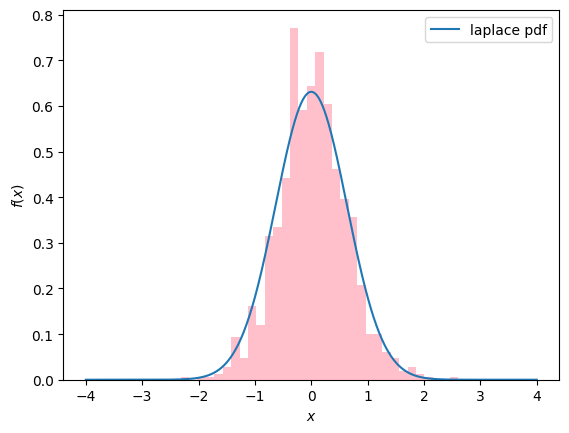

Объем выборки:  10 


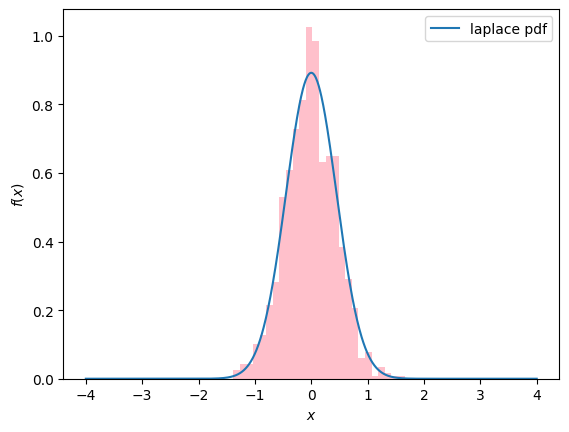

Объем выборки:  50 


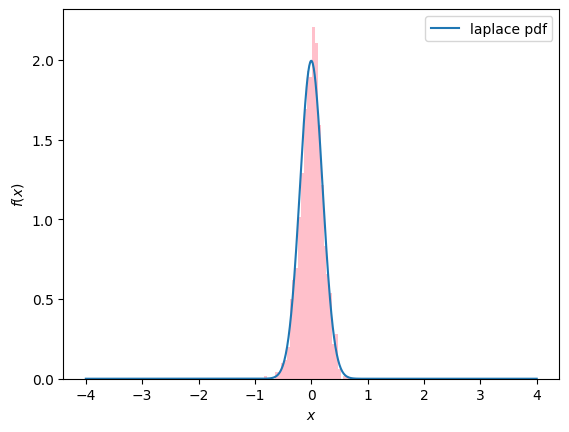

In [92]:
#Определим объем выборок:
choice = (5,10,50)
for n in (choice):
    for i in range(1):
        list_x = sample_laplace(n)
        print ('\033[4m' + 'Объем выборки:', '\033[1m', n, '\033[0m')
        graph_sample_theory_laplace(list_x, n)

# Вывод
1) C увеличением выборки выборочное среднее приближается к мат. ожиданию (истинному значению).
2) Можно заметить концентрацию величин вокруг выборочного среднего значения -> при увеличении объема выборок, распределение выборочных средних становится все ближе к нормальному.
